<a href="https://colab.research.google.com/github/Vaishu03/ML/blob/main/Credit_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification Model**

# Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Credit%20Default.csv')

In [6]:
df.head()

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.2 KB


In [8]:
df.describe()

,Income,Age,Loan,Loan to Income,Default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45331.600018,40.927143,4444.369695,0.098403,0.141500
std,14326.327119,13.262450,3045.410024,0.057620,0.348624
min,20014.489470,18.055189,1.377630,0.000049,0.000000
25%,32796.459720,29.062492,1939.708847,0.047903,0.000000
50%,45789.117310,41.382673,3974.719418,0.099437,0.000000
75%,57791.281670,52.596993,6432.410625,0.147585,0.000000
max,69995.685580,63.971796,13766.051240,0.199938,1.000000


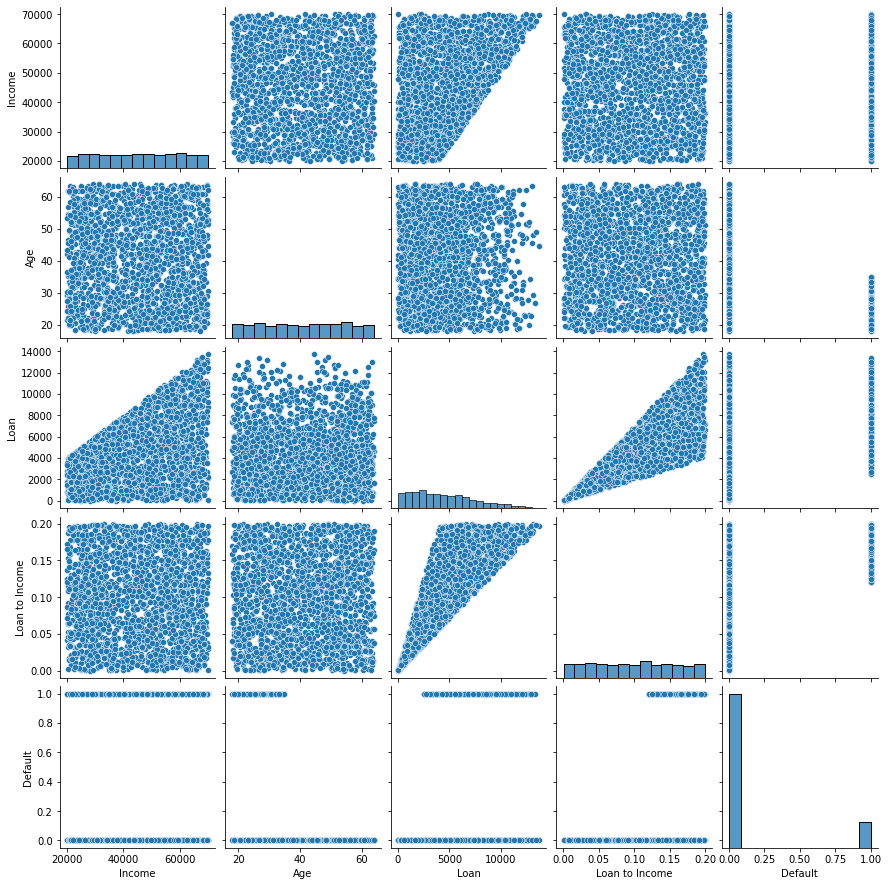

In [10]:
sns.pairplot(df)

# Define X and y

In [11]:
df.columns

Index(['Income', 'Age', 'Loan', 'Loan to Income', 'Default'], dtype='object')

In [12]:
y = df['Default']

In [14]:
y.shape

(2000,)

In [15]:
X = df[['Income', 'Age', 'Loan', 'Loan to Income']]

In [16]:
X.shape

(2000, 4)

# Splitting the dataset

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 10)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1400, 4), (600, 4), (1400,), (600,))

# Standardization

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss = StandardScaler()

In [24]:
X_train = ss.fit_transform(X_train)

In [26]:
X_test = ss.fit_transform(X_test)

# Importing the model

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()

# Train

In [29]:
lr.fit(X_train,y_train)

LogisticRegression()

# Predict

In [30]:
y_pred = lr.predict(X_test)

# Accuracy

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
confusion_matrix(y_test,y_pred)

array([[507,   6],
       [ 18,  69]])

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       513
           1       0.92      0.79      0.85        87

    accuracy                           0.96       600
   macro avg       0.94      0.89      0.91       600
weighted avg       0.96      0.96      0.96       600

